# **Árbol de Decisión**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Árbol de Decisión en la clasificación de genero según la voz
```

## **Árbol de Decisión**
Prueba de un árbol de decisión con el dataset de microorganismos.</br>
El criterio para la constrcción del árbol es el de gini con una profundidad considerable.</br>
Se incluye la etapa de test y predicción, así como el cálculo de las métricas respectivas.

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [2]:
datos = pd.read_csv('voz.csv', sep=',')
datos.head(10)

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## **3. Descripcion de datos**

In [3]:
# Estadisticos basicos por atributos
print(datos.describe())

       frecuencia_media           sd      mediana           Q1           Q3  \
count       3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean           0.180907     0.057126     0.185621     0.140456     0.224765   
std            0.029918     0.016652     0.036360     0.048680     0.023639   
min            0.039363     0.018363     0.010975     0.000229     0.042946   
25%            0.163662     0.041954     0.169593     0.111087     0.208747   
50%            0.184838     0.059155     0.190032     0.140286     0.225684   
75%            0.199146     0.067020     0.210618     0.175939     0.243660   
max            0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.17

## **4. Histograma**

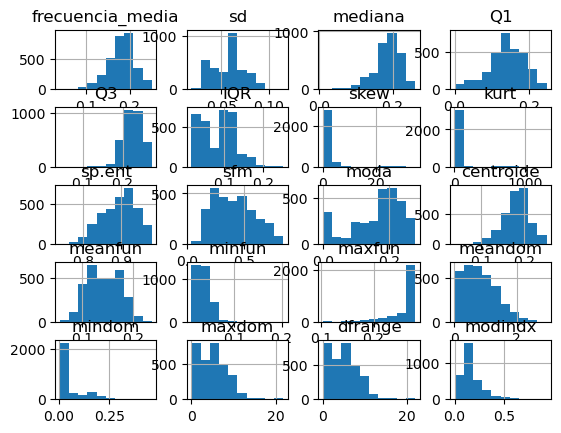

In [4]:
datos.hist()
plt.show()

## **5. Distribucion de clases**

In [5]:
# Numero de registros por especie de iris
print(datos.groupby('genero').size())

genero
female    1584
male      1584
dtype: int64


## **6. Separación de datos, para entrenamiento y test**

In [6]:
x = datos.drop(['genero'], axis = 1)
y = datos['genero']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, train_size=0.8)

## **7. Entrenamiento de árbol de decisión**

In [22]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
#=========
# Indice de impuresa GINI: (criterion)
# Máxima profundidad del árbol: (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion='gini', max_depth=200)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=200)

## **Test AD**

In [23]:
ArbolDecision.score(x_test, y_test)

0.9526813880126183

## **8. Gráfica de árbol de decisión**

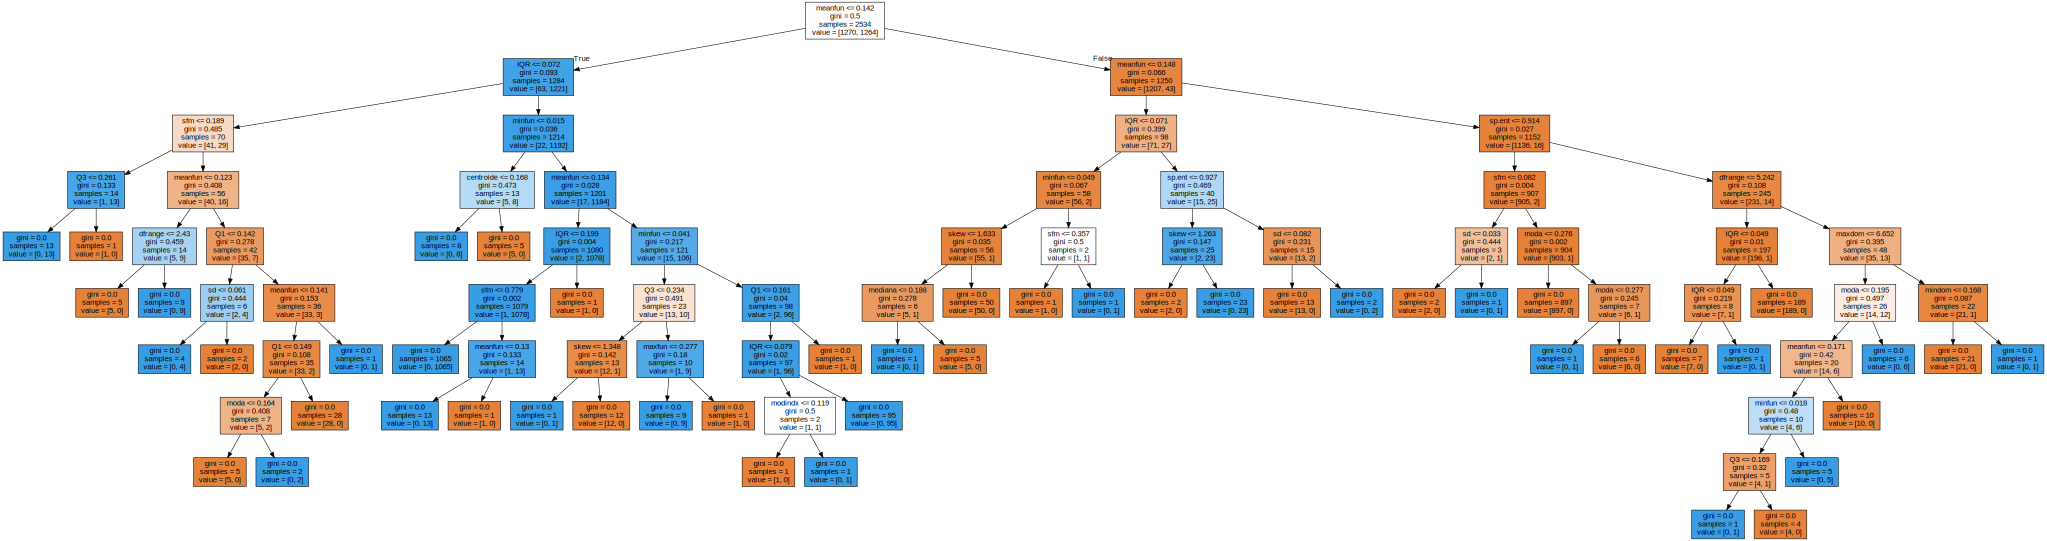

In [25]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **9. Test**

In [26]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

['female' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'ma

## **10. Matriz de confusión y métricas**

In [27]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[296  18]
 [ 12 308]]
Exactitud =  0.9526813880126183


## **11. Prediccion**

In [28]:
nuevo = np.array([[0.23, 0.040, 0.24, 0.21, 0.27, 0.05, 2.00, 6.80, 0.80, 0.20, 0.25, 0.23, 0.18, 0.04, 0.27, 1.60, 0.21, 10.10, 9.80, 0.16]])

pred = ArbolDecision.predict(nuevo)
print(pred)

['female']


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
